# SIR Model with Derived Outputs Example

This example builds on the "minimal SIR model example" and shows you how you can request more detailed outputs from the model, rather than just the compartment sizes. For starters, let's re-build the SIR model from before:

In [1]:
from summer import CompartmentalModel

model = CompartmentalModel(
    times=[1990, 2025],
    compartments=["S", "I", "R"],
    infectious_compartments=["I"],
    timestep=0.1,
)
model.set_initial_population(distribution={"S": 990, "I": 10})
model.add_infection_frequency_flow(name="infection", contact_rate=2, source="S", dest="I")
model.add_sojourn_flow(name="recovery", sojourn_time=3, source="I", dest="R")
model.add_death_flow(name="infection_death", death_rate=0.5, source="I")

### Requesting "derived outputs"

Before we run the model, we can ask it to calculate extra outputs that are derived from the compartment sizes and flow rates. For example, we might want to ask the model to track the number of people who died from infection per year.

Note that since we're tracking a flow, the value will depend on the **timestep**. Eg:

- a
- a

In [2]:
model.request_output_for_flow(name="infection_death", flow_name="infection_death")

Now when we run the model, it will create an NumPy array of infection deaths that we can access via `model.derived_outputs`.

In [3]:
model.run()

Now we can use the calculated derived outputs to plot the number of infection deaths.

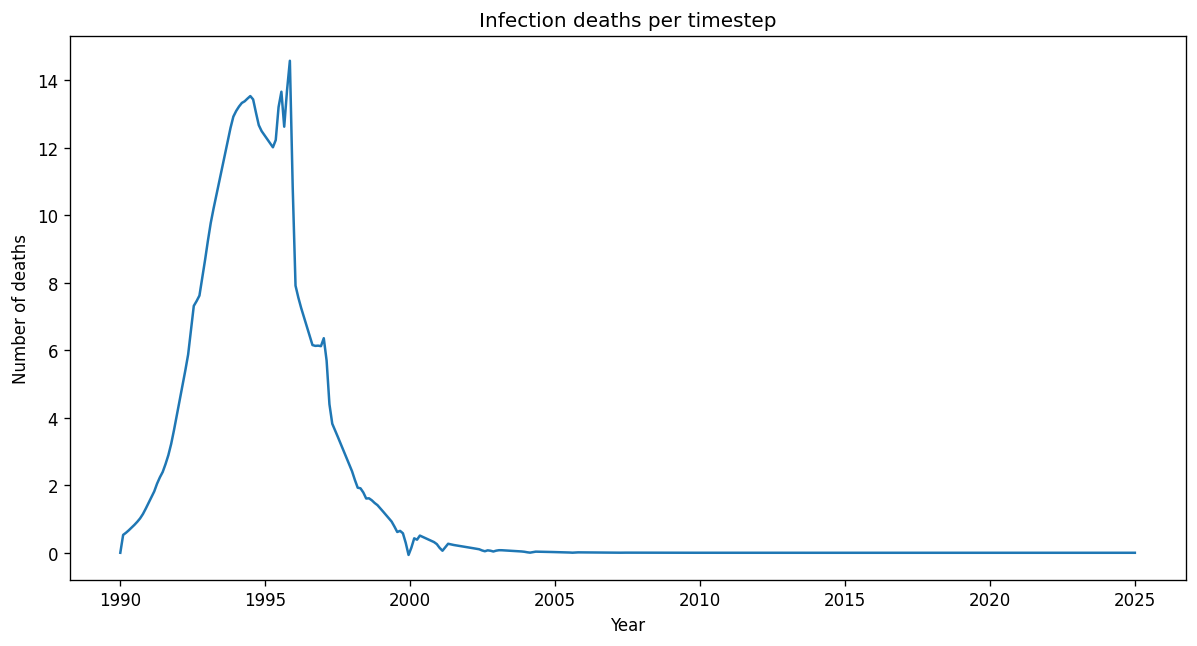

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=120)
ax.plot(model.times, model.derived_outputs["infection_death"])
ax.set_title("Infection deaths per timestep")
ax.set_xlabel("Year")
ax.set_ylabel("Number of deaths")
plt.show()



### Cumulative outputs

You can request that the model tracks the cumulative sum of derived outputs over time. For example, let's track total infection deaths and the total people recovered:

In [5]:
model.request_output_for_flow(name="recovery", flow_name="recovery")
model.request_cumulative_output(name="recovery_cum", source="recovery")
model.request_cumulative_output(name="infection_death_cum", source="infection_death")
model.run()

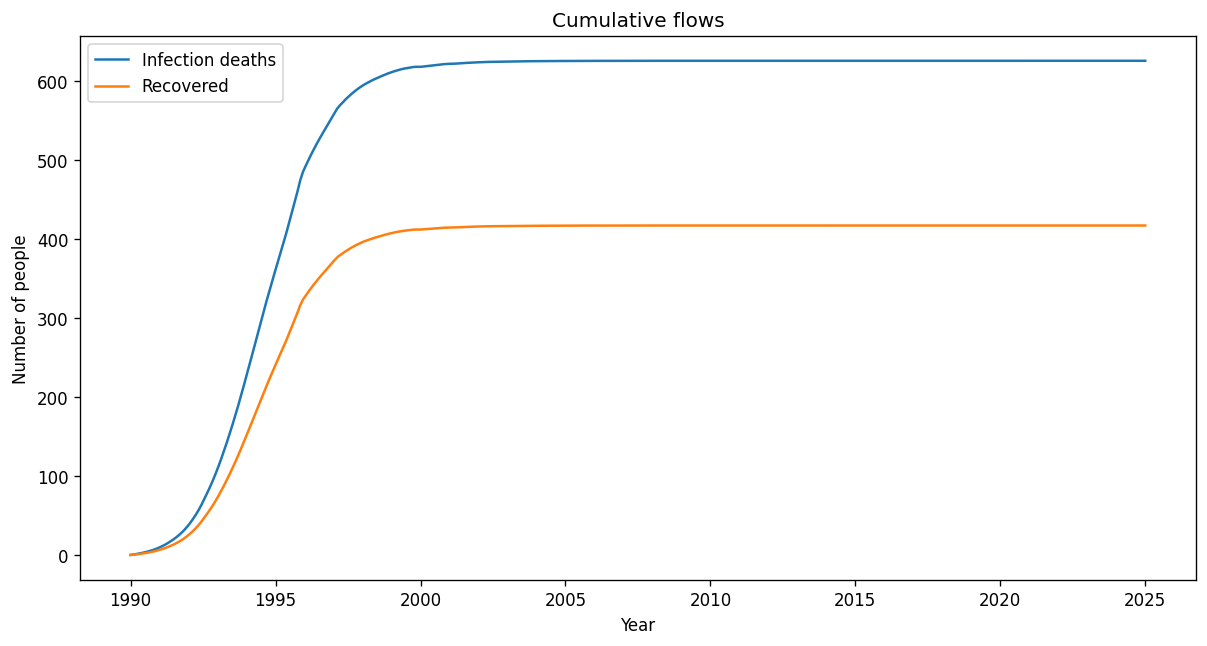

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=120)
ax.plot(model.times, model.derived_outputs["infection_death_cum"])
ax.plot(model.times, model.derived_outputs["recovery_cum"])
ax.set_title("Cumulative flows")
ax.set_xlabel("Year")
ax.set_ylabel("Number of people")
ax.legend(["Infection deaths", "Recovered"])
plt.show()

### Tracking compartment sizes

You can also use derived outputs to track groups of compartments.

In [7]:
model.request_output_for_compartments(name="total_population", compartments=["S", "I", "R"])
model.run()

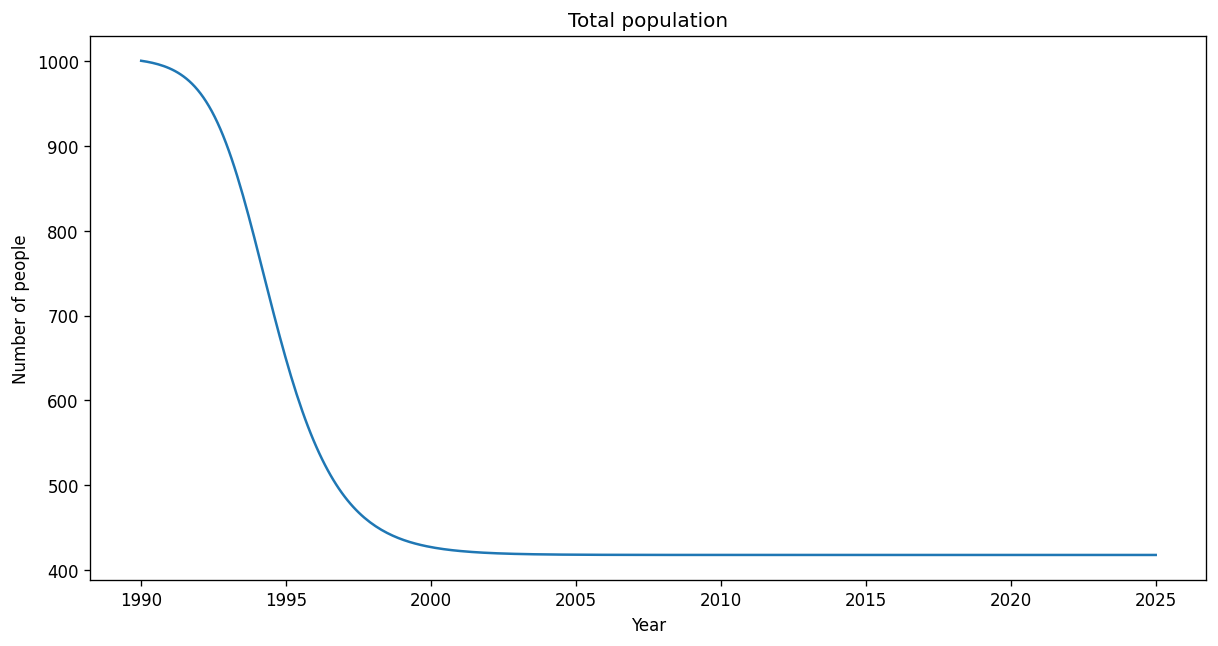

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=120)
ax.plot(model.times, model.derived_outputs["total_population"])
ax.set_title("Total population")
ax.set_xlabel("Year")
ax.set_ylabel("Number of people")
plt.show()

In [9]:
model.outputs[-1].sum()

418.0609002176338

In [10]:
model.derived_outputs["infection_death_cum"][-1]

625.560707910985

In [11]:
model.outputs[-1].sum() + model.derived_outputs["infection_death_cum"][-1]

1043.6216081286188

## More complicated derived output calculations

Derived output requests can be combined in a chain to achieve more complicated calculations. For example, here we request a calculation that gets us the prevalence of the disease:

In [12]:
model.request_output_for_compartments(name="count_infectious", compartments=["I"], save_results=False)
model.request_function_output(
    name="prevalence",
    sources=["count_infectious", "total_population"],
    func=lambda count, total: count / total,
)
model.run()

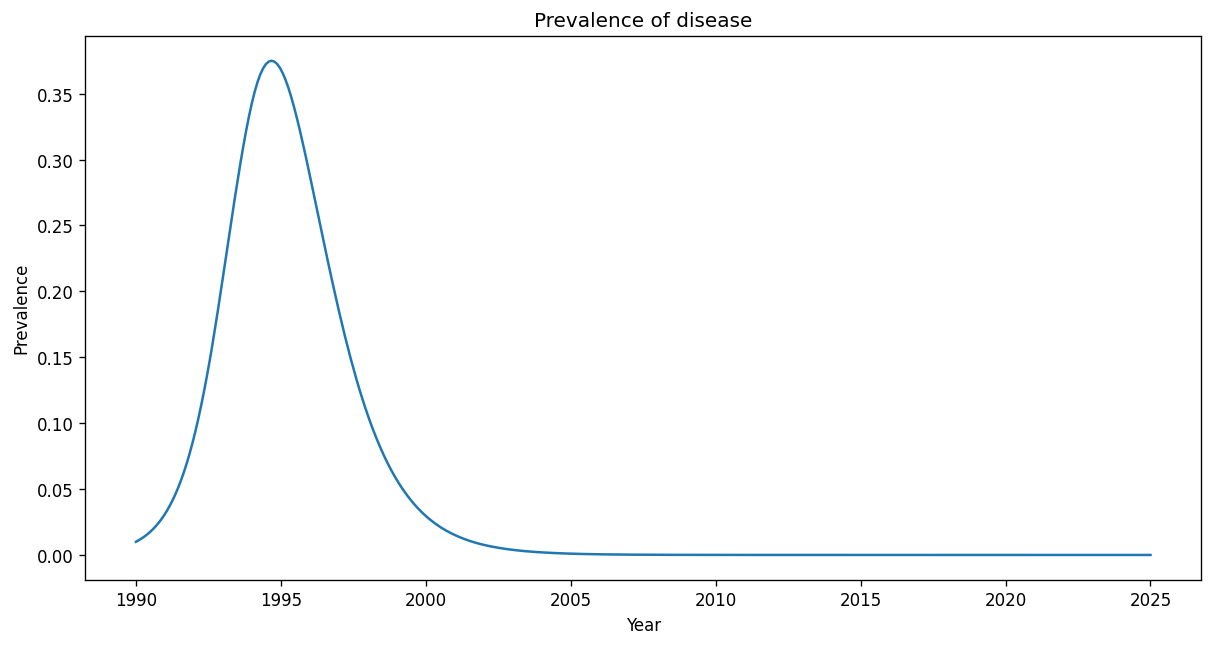

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=120)
ax.plot(model.times, model.derived_outputs["prevalence"])
ax.set_title("Prevalence of disease")
ax.set_xlabel("Year")
ax.set_ylabel("Prevalence")
plt.show()

That's it for now, now you know how to:

- request derived outputs
- chain and combine derived outputs
- access and visualize the derived outputs

A detailed API reference of the CompartmentalModel class can be found [here](http://summerepi.com/api/model.html)